### EDA_Penetración-poblacion.ipynb

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo 
regulador de las telecomunicaciones en el país.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Penetración de internet en la población."**, que permite analizar la 
relación entre el número de accesos y la cantidad de habitantes.

### Objetivo del Análisis
El propósito de este análisis es **determinar el porcentaje de la población con acceso a internet**, evaluar desigualdades 
en la conectividad y detectar oportunidades de mejora en la distribución del servicio.

In [1]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Penetración-poblacion.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [2]:
# Extraer el nombre de las columnas
nombres_columnas = df.columns.tolist()
print("Nombres de las columnas:")
print(nombres_columnas)

Nombres de las columnas:
['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab']


In [3]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Año                       1000 non-null   int64 
 1   Trimestre                 1000 non-null   int64 
 2   Provincia                 1000 non-null   object
 3   Accesos por cada 100 hab  1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB
None
    Año  Trimestre     Provincia  Accesos por cada 100 hab
0  2024          2  BUENOS AIRES                        27
1  2024          2          CABA                        47
2  2024          2     CATAMARCA                        17
3  2024          2         CHACO                        11
4  2024          2        CHUBUT                        26


In [4]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [5]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'CABA',
        'CAPITAL FEDERAL': 'CABA',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario y dependiente del archivo
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")



Valores únicos en 'Provincia' después de los reemplazos:
['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CÓRDOBA' 'CORRIENTES'
 'ENTRE RÍOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUÉN' 'RÍO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMÁN']
La columna 'Partido' no existe en el DataFrame.
La columna 'Localidad' no existe en el DataFrame.


In [6]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' ya es de tipo int64.


In [7]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [8]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Año                       1000 non-null   int64 
 1   Trimestre                 1000 non-null   int64 
 2   Provincia                 1000 non-null   object
 3   Accesos por cada 100 hab  1000 non-null   int64 
 4   Trimestre_Label           1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB
None


In [9]:
import sweetviz as sv
from skimpy import skim

c:\Program Files\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Año                       1000 non-null   int64 
 1   Trimestre                 1000 non-null   int64 
 2   Provincia                 1000 non-null   object
 3   Accesos por cada 100 hab  1000 non-null   int64 
 4   Trimestre_Label           1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB
None
    Año  Trimestre     Provincia  Accesos por cada 100 hab Trimestre_Label
0  2024          2  BUENOS AIRES                        27              Q2
1  2024          2          CABA                        47              Q2
2  2024          2     CATAMARCA                        17              Q2
3  2024          2         CHACO                        11              Q2
4  2024          2        CHUBUT                        26              Q2


In [11]:
from skimpy import skim

# Resumen del DataFrame
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1000   │ │ int64       │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                   ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Año                      │   0 │     0 │    2019 │  3.021 │  2014 │  2016 │  2019 │  2021 │  2024 │ ▇▇▃▇▇▆ │  │
│ │ Trimestre                │   0 │     0 │   2.464 │  1.114 │     1 │     1 │     2 │     3 │     4 │ ▇ ▇ ▇▇ │  │
│ │ Accesos por cada 100 hab │   0 │     0 │   15.22 │  9.247 │     2 │     9 │    13 │    20 │    52 │ ▇▇▅▁ ▁ │  │
│ └──────────────────────────┴─────┴───────┴─────────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃            ┃    ┃      ┃          ┃            ┃           ┃         ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column     ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min       ┃ max     ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Provincia  │  0 │    0 │ CABA     │ SANTIAGO   │ BUENOS    │ TUCUMÁN │       8.45 │       1.5 │       1538 │  │
│ │            │    │      │          │ DEL ESTERO │ AIRES     │         │            │           │            │  │
│ │ Trimestre_ │  0 │    0 │ Q2       │ Q2         │ Q1        │ Q4      │          2 │         1 │       1000 │  │
│ │ Label      │    │      │          │            │           │         │            │           │            │  │
│ └────────────┴────┴──────┴──────────┴────────────┴───────────┴─────────┴────────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯


Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
                Año    Trimestre     Provincia  Accesos por cada 100 hab  \
count   1000.000000  1000.000000          1000               1000.000000   
unique          NaN          NaN            24                       NaN   
top             NaN          NaN  BUENOS AIRES                       NaN   
freq            NaN          NaN            42                       NaN   
mean    2018.800000     2.464000           NaN                 15.219000   
std        3.021445     1.114426           NaN                  9.247191   
min     2014.000000     1.000000           NaN                  2.000000   
25%     2016.000000     1.000000           NaN                  9.000000   
50%     2019.000000     2.000000           NaN                 13.000000   
75%     2021.000000     3.000000           NaN                 20.000000   
max     2024.000000     4.000000           NaN                 52.000000   

       Trimes

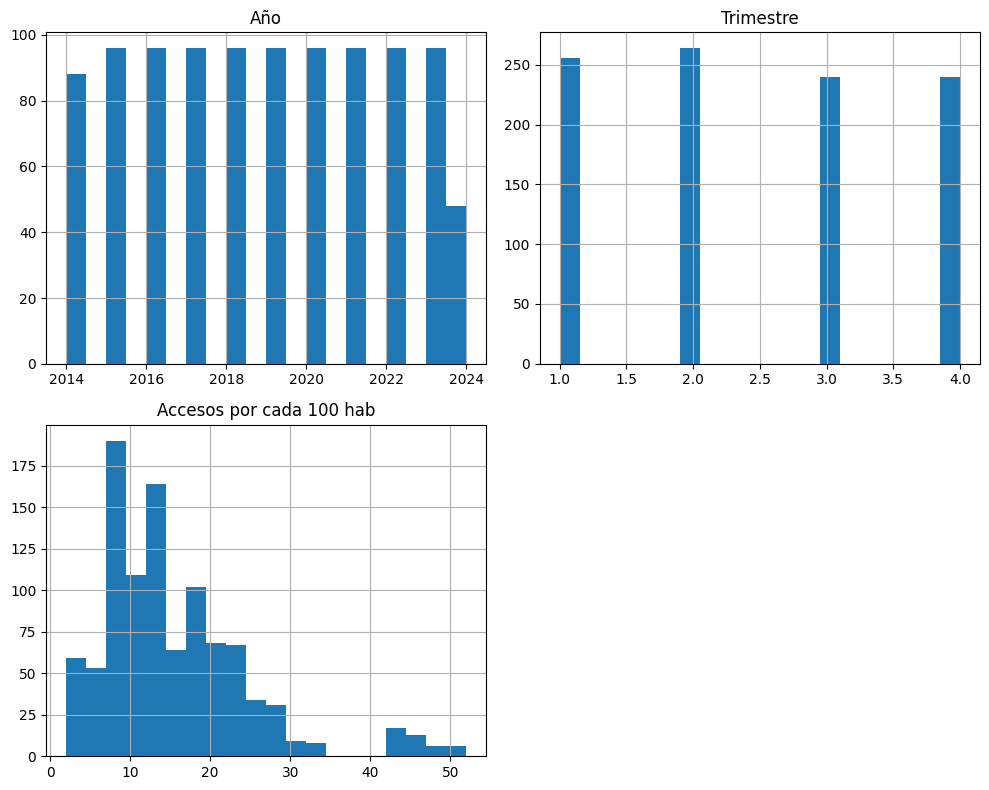

In [12]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
                               Año  Trimestre  Accesos por cada 100 hab
Año                       1.000000  -0.091325                  0.368437
Trimestre                -0.091325   1.000000                  0.003243
Accesos por cada 100 hab  0.368437   0.003243                  1.000000


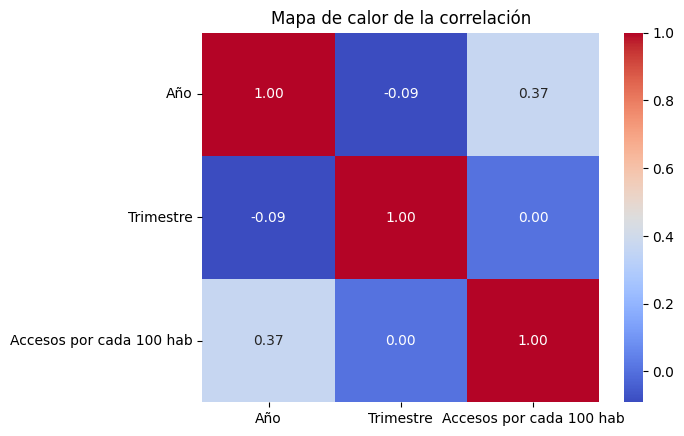

In [13]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [14]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Provincia y Trimestre_Label:
Trimestre_Label      Q1  Q2  Q3  Q4
Provincia                          
BUENOS AIRES         11  11  10  10
CABA                 11  11  10  10
CATAMARCA            11  11  10  10
CHACO                11  11  10  10
CHUBUT               11  11  10  10
CORRIENTES           11  11  10  10
CÓRDOBA              11  11  10  10
ENTRE RÍOS           11  11  10  10
FORMOSA              11  11  10  10
JUJUY                11  11  10  10
LA PAMPA             11  11  10  10
LA RIOJA             11  11  10  10
MENDOZA              11  11  10  10
MISIONES             11  11  10  10
NEUQUÉN              11  11  10  10
RÍO NEGRO            11  11  10  10
SALTA                10  11  10  10
SAN JUAN             10  11  10  10
SAN LUIS             10  11  10  10
SANTA CRUZ           10  11  10  10
SANTA FE             10  11  10  10
SANTIAGO DEL ESTERO  10  11  10  10
TIERRA DEL FUEGO     10  11  10  10
TUCUMÁN              10  11  10  10
Tabla d

Tabla de contingencia entre Provincia y Trimestre_Label:
Trimestre_Label      Q1  Q2  Q3  Q4
Provincia                          
BUENOS AIRES         11  11  10  10
CABA                 11  11  10  10
CATAMARCA            11  11  10  10
CHACO                11  11  10  10
CHUBUT               11  11  10  10
CORRIENTES           11  11  10  10
CÓRDOBA              11  11  10  10
ENTRE RÍOS           11  11  10  10
FORMOSA              11  11  10  10
JUJUY                11  11  10  10
LA PAMPA             11  11  10  10
LA RIOJA             11  11  10  10
MENDOZA              11  11  10  10
MISIONES             11  11  10  10
NEUQUÉN              11  11  10  10
RÍO NEGRO            11  11  10  10
SALTA                10  11  10  10
SAN JUAN             10  11  10  10
SAN LUIS             10  11  10  10
SANTA CRUZ           10  11  10  10
SANTA FE             10  11  10  10
SANTIAGO DEL ESTERO  10  11  10  10
TIERRA DEL FUEGO     10  11  10  10
TUCUMÁN              10  11  10  10


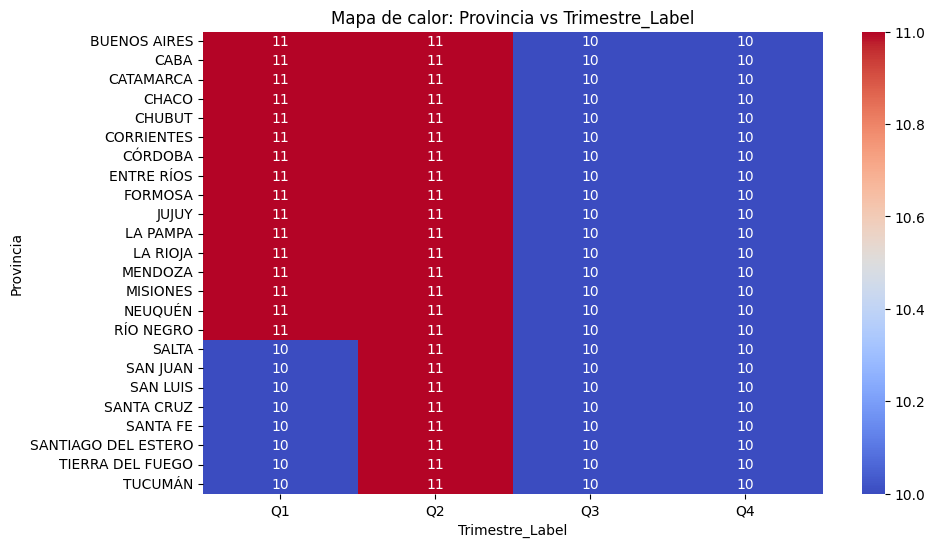

Tabla de contingencia entre Trimestre_Label y Provincia:
Provincia        BUENOS AIRES  CABA  CATAMARCA  CHACO  CHUBUT  CORRIENTES  \
Trimestre_Label                                                             
Q1                         11    11         11     11      11          11   
Q2                         11    11         11     11      11          11   
Q3                         10    10         10     10      10          10   
Q4                         10    10         10     10      10          10   

Provincia        CÓRDOBA  ENTRE RÍOS  FORMOSA  JUJUY  ...  NEUQUÉN  RÍO NEGRO  \
Trimestre_Label                                       ...                       
Q1                    11          11       11     11  ...       11         11   
Q2                    11          11       11     11  ...       11         11   
Q3                    10          10       10     10  ...       10         10   
Q4                    10          10       10     10  ...       10         

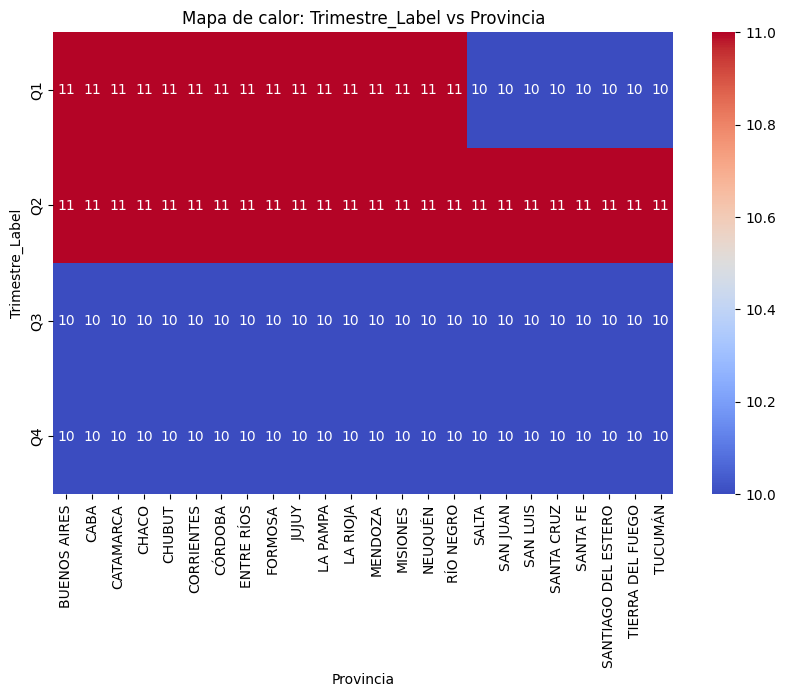

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


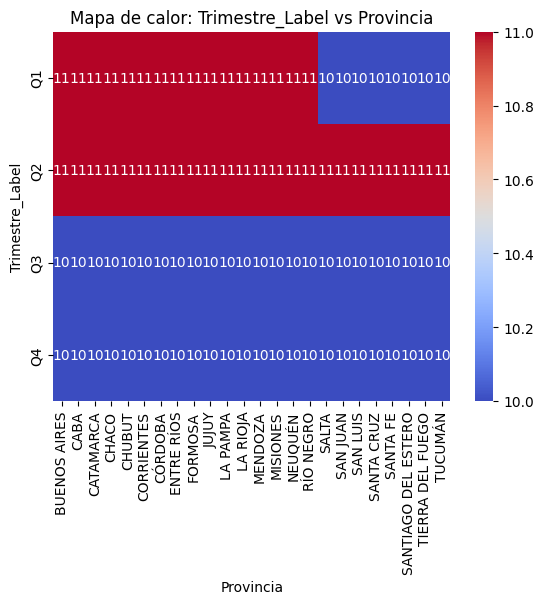

In [16]:
# Visualizar una tabla de contingencia específica como mapa de calor
tabla_contingencia = pd.crosstab(df['Trimestre_Label'], df['Provincia'])
sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
plt.title("Mapa de calor: Trimestre_Label vs Provincia")
plt.show()


In [17]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
          Año  Trimestre  Accesos por cada 100 hab
0    1.721892  -0.416566                  1.274646
1    1.721892  -0.416566                  3.438547
2    1.721892  -0.416566                  0.192695
3    1.721892  -0.416566                 -0.456475
4    1.721892  -0.416566                  1.166451
..        ...        ...                       ...
995 -1.589439  -1.314338                 -1.213840
996 -1.589439  -1.314338                 -0.781060
997 -1.589439  -1.314338                 -0.997450
998 -1.589439  -1.314338                 -0.131890
999 -1.589439  -1.314338                 -0.240085

[1000 rows x 3 columns]


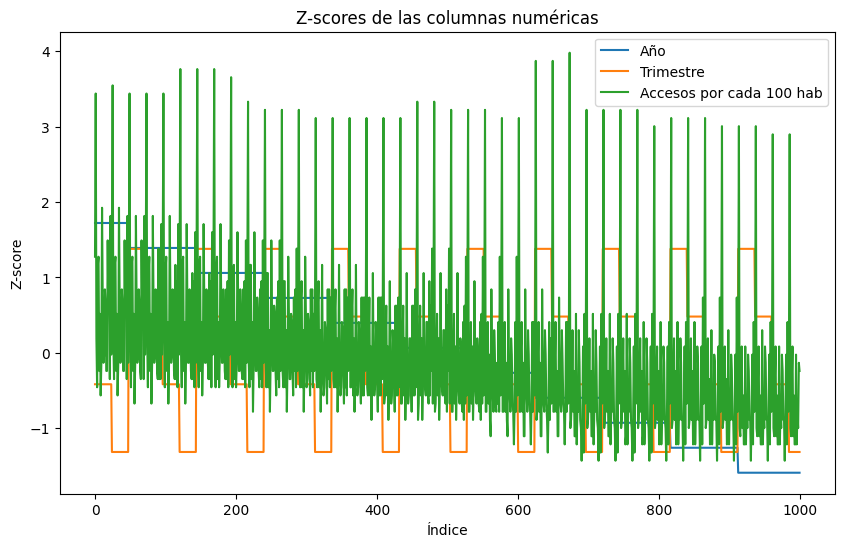

In [18]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [19]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Provincia':
Provincia
BUENOS AIRES           42
CABA                   42
CATAMARCA              42
CHACO                  42
CHUBUT                 42
CÓRDOBA                42
CORRIENTES             42
ENTRE RÍOS             42
FORMOSA                42
JUJUY                  42
LA PAMPA               42
LA RIOJA               42
MENDOZA                42
MISIONES               42
NEUQUÉN                42
RÍO NEGRO              42
SALTA                  41
SAN JUAN               41
SAN LUIS               41
SANTA CRUZ             41
SANTA FE               41
SANTIAGO DEL ESTERO    41
TIERRA DEL FUEGO       41
TUCUMÁN                41
Name: count, dtype: int64

Conteo de categorías en la columna 'Trimestre_Label':
Trimestre_Label
Q2    264
Q1    256
Q4    240
Q3    240
Name: count, dtype: int64


In [20]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


In [21]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Penetración-poblacion.csv


In [22]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Año                         0.017454
Trimestre                   0.055832
Accesos por cada 100 hab    1.503442
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Año                        -1.182505
Trimestre                  -1.348124
Accesos por cada 100 hab    2.838683
dtype: float64


In [23]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
                   Variable            VIF
0                     const  521623.674938
1                       Año       1.168642
2                 Trimestre       1.010014
3  Accesos por cada 100 hab       1.158908


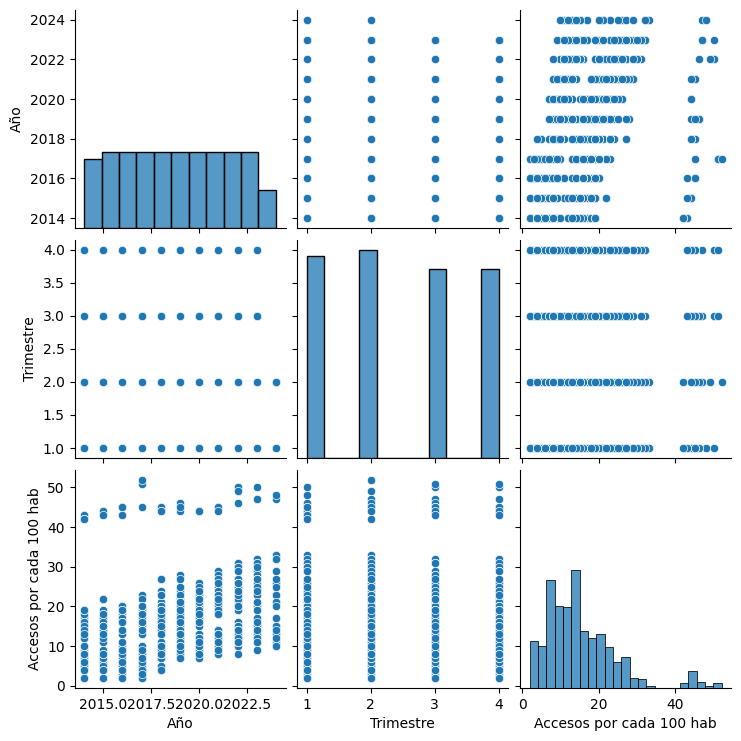

In [24]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [25]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Provincia':
                      Año                                                 \
                    count         mean       std     min     25%     50%   
Provincia                                                                  
BUENOS AIRES         42.0  2018.761905  3.074756  2014.0  2016.0  2019.0   
CABA                 42.0  2018.761905  3.074756  2014.0  2016.0  2019.0   
CATAMARCA            42.0  2018.761905  3.074756  2014.0  2016.0  2019.0   
CHACO                42.0  2018.761905  3.074756  2014.0  2016.0  2019.0   
CHUBUT               42.0  2018.761905  3.074756  2014.0  2016.0  2019.0   
CORRIENTES           42.0  2018.761905  3.074756  2014.0  2016.0  2019.0   
CÓRDOBA              42.0  2018.761905  3.074756  2014.0  2016.0  2019.0   
ENTRE RÍOS           42.0  2018.761905  3.074756  2014.0  2016.0  2019.0   
FORMOSA              42.0  2018.761905  3.074756  2014.0  2016.0  2019.0   
JUJUY                42.0  2018.761905  3.074756

In [26]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0



Estadísticas por grupo de 'Provincia':
                             Año  Trimestre  Accesos por cada 100 hab
Provincia                                                            
BUENOS AIRES         2018.761905   2.452381                 21.095238
CABA                 2018.761905   2.452381                 45.642857
CATAMARCA            2018.761905   2.452381                 10.000000
CHACO                2018.761905   2.452381                  8.809524
CHUBUT               2018.761905   2.452381                 17.190476
CORRIENTES           2018.761905   2.452381                  9.452381
CÓRDOBA              2018.761905   2.452381                 21.023810
ENTRE RÍOS           2018.761905   2.452381                 15.547619
FORMOSA              2018.761905   2.452381                  6.690476
JUJUY                2018.761905   2.452381                  9.333333
LA PAMPA             2018.761905   2.452381                 24.285714
LA RIOJA             2018.761905   2.452381       

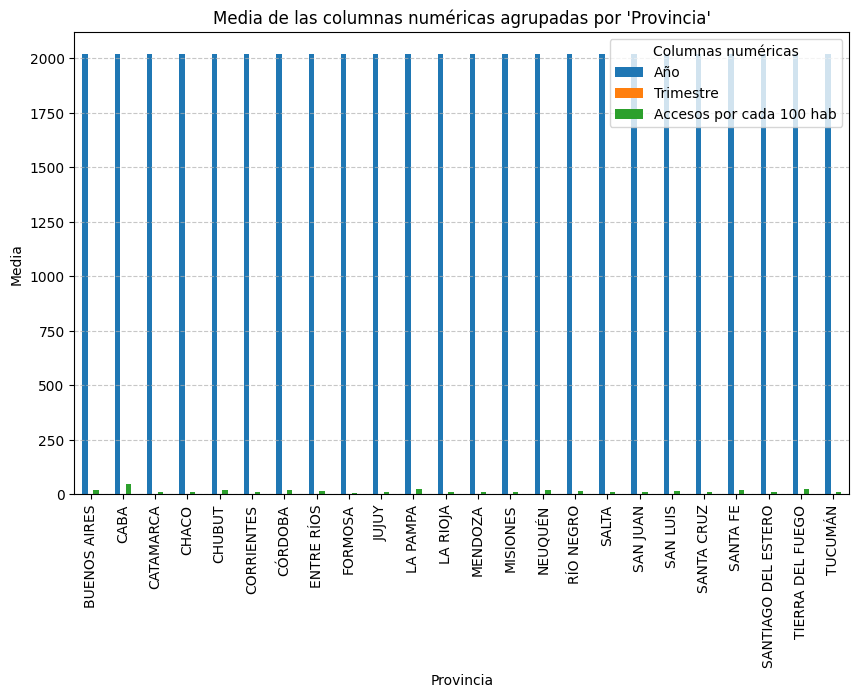


Estadísticas por grupo de 'Trimestre_Label':
                        Año  Trimestre  Accesos por cada 100 hab
Trimestre_Label                                                 
Q1               2019.15625        1.0                 15.140625
Q2               2019.00000        2.0                 15.295455
Q3               2018.50000        3.0                 15.162500
Q4               2018.50000        4.0                 15.275000


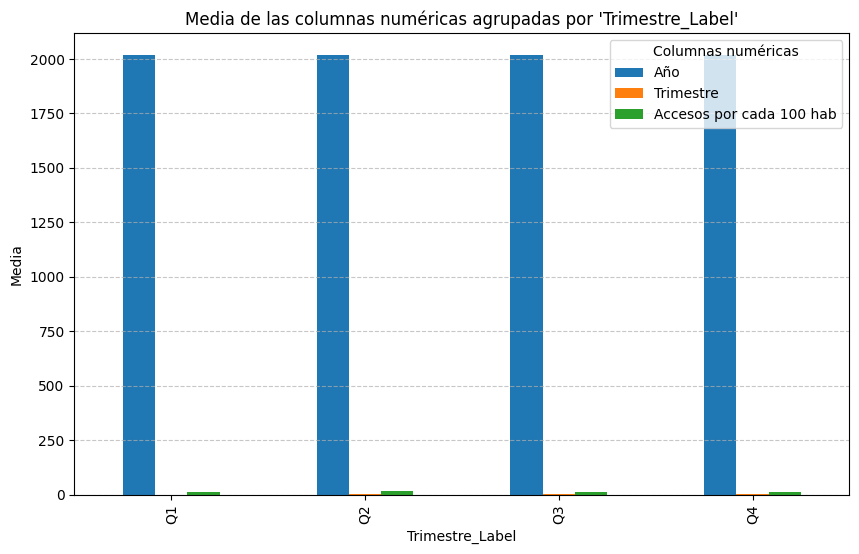

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


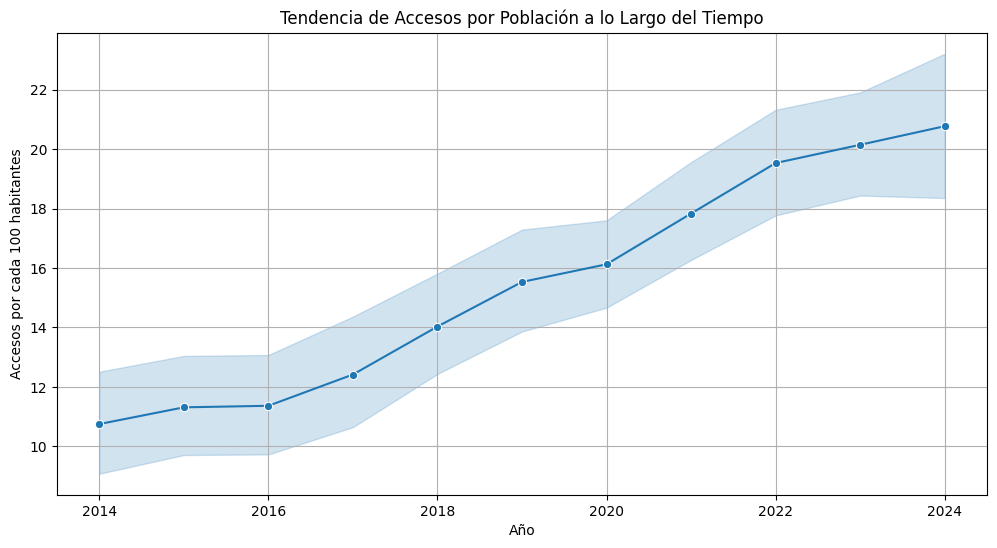

In [28]:
# Graficar la tendencia de accesos por población a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Año', y='Accesos por cada 100 hab', marker='o')
plt.title('Tendencia de Accesos por Población a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 habitantes')
plt.grid(True)
plt.show()

In [29]:
# Filtrar los datos para los últimos 10 años
df_ultimos_10_anos = df[df['Año'] >= (df['Año'].max() - 10)]

# Agrupar por 'Provincia' y sumar los accesos
accesos_por_provincia = df_ultimos_10_anos.groupby('Provincia')['Accesos por cada 100 hab'].sum()

# Ordenar las provincias por el número de accesos en orden descendente
accesos_por_provincia = accesos_por_provincia.sort_values(ascending=False)

# Mostrar las 15 provincias con mayor número de accesos
top_15_provincias = accesos_por_provincia.head(15)
print(top_15_provincias)

Provincia
CABA                1917
LA PAMPA            1020
TIERRA DEL FUEGO     995
BUENOS AIRES         886
CÓRDOBA              883
SANTA FE             827
NEUQUÉN              787
CHUBUT               722
RÍO NEGRO            702
ENTRE RÍOS           653
SAN LUIS             599
LA RIOJA             516
TUCUMÁN              456
MENDOZA              439
SANTA CRUZ           421
Name: Accesos por cada 100 hab, dtype: int64


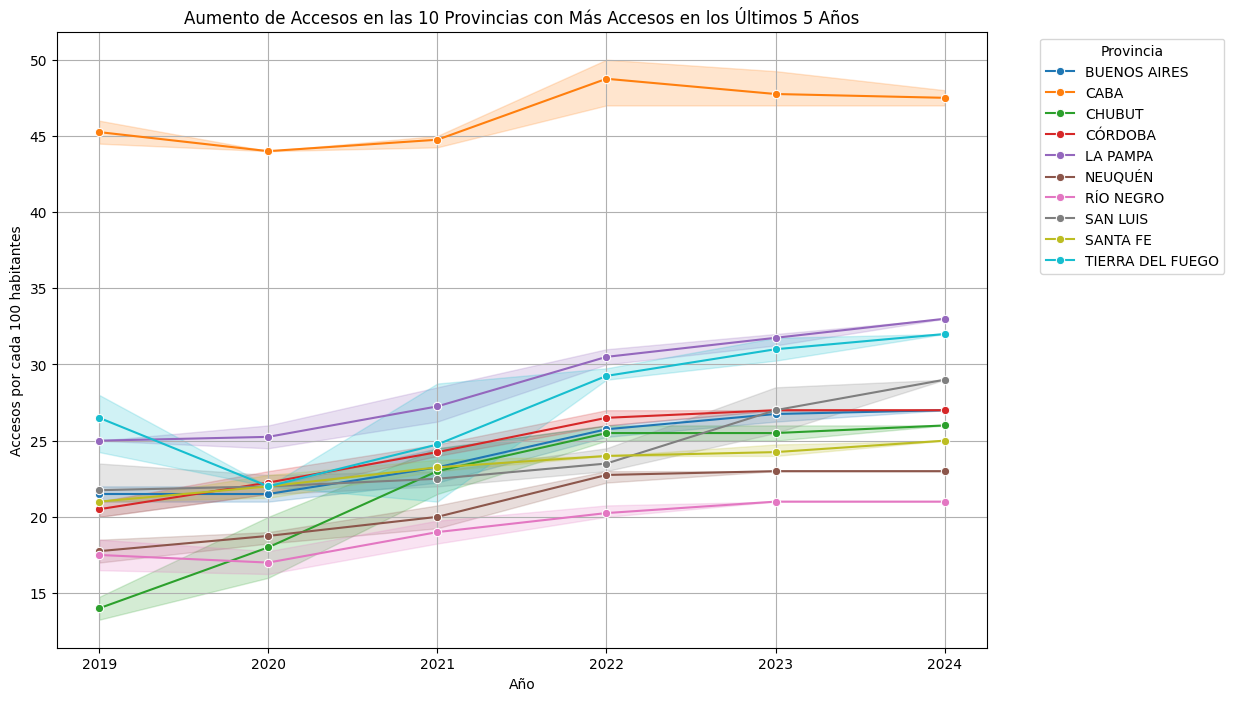

In [30]:
# Filtrar los datos para los últimos 5 años
df_ultimos_5_anos = df[df['Año'] >= (df['Año'].max() - 5)]

# Agrupar por 'Provincia' y sumar los accesos
accesos_por_provincia_5_anos = df_ultimos_5_anos.groupby('Provincia')['Accesos por cada 100 hab'].sum()

# Ordenar las provincias por el número de accesos en orden descendente
accesos_por_provincia_5_anos = accesos_por_provincia_5_anos.sort_values(ascending=False)

# Seleccionar las 10 provincias con mayor número de accesos
top_10_provincias = accesos_por_provincia_5_anos.head(10).index

# Filtrar el DataFrame original para incluir solo las 10 provincias seleccionadas
df_top_10_provincias = df_ultimos_5_anos[df_ultimos_5_anos['Provincia'].isin(top_10_provincias)]

# Graficar el aumento de accesos en las 10 provincias con más accesos en los últimos 5 años
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_top_10_provincias, x='Año', y='Accesos por cada 100 hab', hue='Provincia', marker='o')
plt.title('Aumento de Accesos en las 10 Provincias con Más Accesos en los Últimos 5 Años')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 habitantes')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Análisis Exploratorio de Datos (EDA) - Penetración de Internet en la Población

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo regulador de las telecomunicaciones en el país.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Penetración de internet en la población."**, que permite analizar la relación entre el número de accesos y la cantidad de habitantes.

### Objetivo del Análisis
El propósito de este análisis es **determinar el porcentaje de la población con acceso a internet**, evaluar desigualdades en la conectividad y detectar oportunidades de mejora en la distribución del servicio.

## Pasos del Análisis

### 1. Cargar el archivo y normalizar los nombres
- Se cargó el archivo CSV y se verificó su existencia.
- Se extrajeron y normalizaron los nombres de las columnas.

### 2. Reemplazar variaciones específicas
- Se reemplazaron variaciones específicas en las columnas 'Provincia', 'Partido' y 'Localidad' para estandarizar los datos.

### 3. Verificación y conversión de tipos de datos
- Se verificó la existencia de la columna 'Trimestre' y se convirtió a tipo `int64` si era necesario.
- Se creó la columna 'Trimestre_Label' basada en 'Trimestre' con etiquetas descriptivas (Q1, Q2, Q3, Q4).

### 4. Estadísticas descriptivas y análisis exploratorio
- Se generaron estadísticas descriptivas para columnas numéricas y de tipo `object`.
- Se visualizaron histogramas de las columnas numéricas.
- Se calculó y visualizó la matriz de correlación entre columnas numéricas.
- Se generaron tablas de contingencia y mapas de calor para columnas categóricas.

### 5. Cálculo de Z-scores
- Se calcularon los Z-scores para las columnas numéricas y se graficaron.

### 6. Análisis de distribuciones
- Se calcularon y mostraron los valores de skewness (asimetría) y kurtosis (curtosis) de las columnas numéricas.

### 7. Verificación de multicolinealidad
- Se calculó el Factor de Inflación de la Varianza (VIF) para verificar la existencia de multicolinealidad entre variables numéricas.

### 8. Visualización de relaciones entre variables
- Se generaron pairplots para visualizar la relación entre variables numéricas.

### 9. Agrupamiento por categorías
- Se calcularon estadísticas descriptivas agrupadas por columnas categóricas y se graficaron.

### 10. Verificación de duplicados
- Se verificó el número de filas duplicadas en el DataFrame.

### 11. Guardar cambios
- Se guardaron los cambios realizados en el DataFrame en el mismo archivo CSV.

## Conclusiones
El análisis exploratorio de datos permitió identificar patrones y relaciones importantes en el conjunto de datos, así como detectar posibles problemas de calidad de datos que fueron corregidos. Este EDA proporciona una base sólida para futuros análisis y modelado de datos.

## Requisitos
- Python 3.x
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Sweetviz
- Skimpy
- Scipy
- Statsmodels

## Cómo ejecutar el análisis
1. Clonar el repositorio.
2. Instalar los requisitos utilizando `pip install -r requirements.txt`.
3. Ejecutar el notebook `EDA_Penetración-poblacion.ipynb`.
